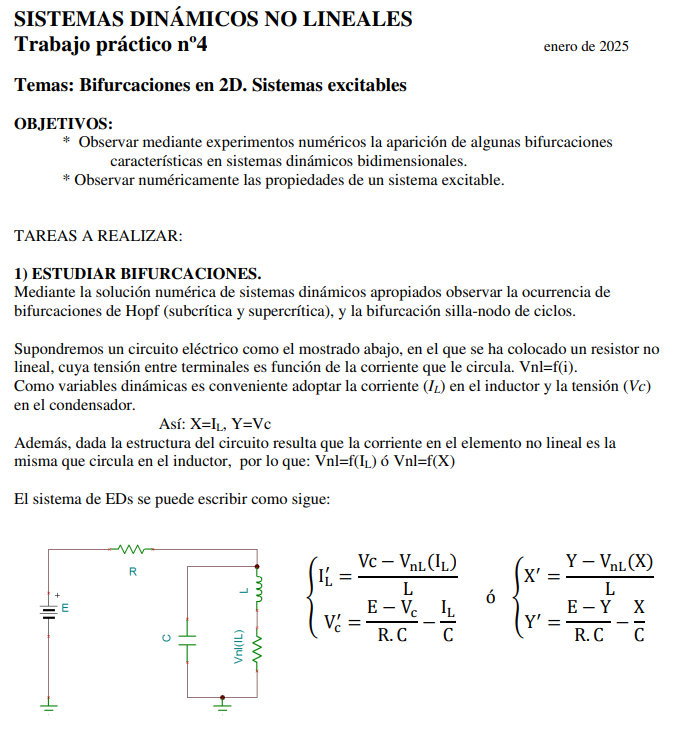

##################1) ESTUDIAR BIFURCACIONES.################3

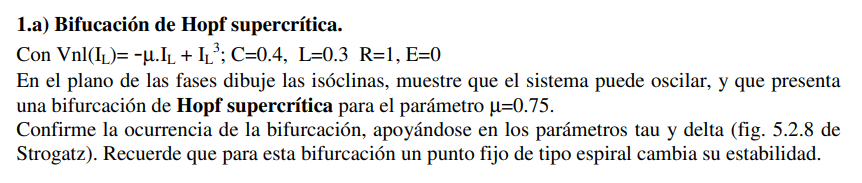

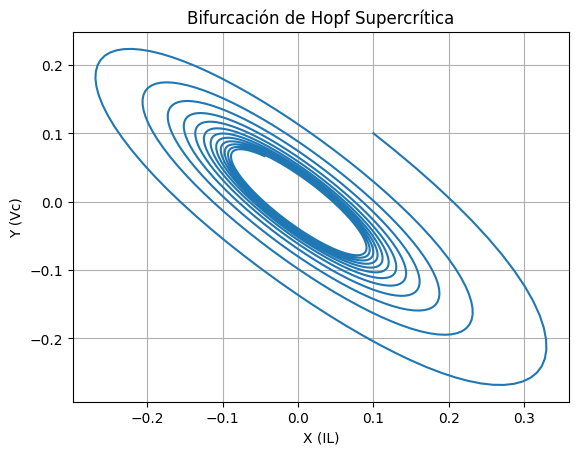

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
C = 0.4
L = 0.3
R = 1
E = 0
mu = 0.75

# Definición de la función no lineal
def Vnl(IL):
    return -mu * IL + IL**3

# Sistema de ecuaciones diferenciales
def sistema(t, variables):
    X, Y = variables
    dX_dt = (Y - Vnl(X)) / L
    dY_dt = (E - Y) / (R * C) - X / C
    return [dX_dt, dY_dt]

# Condiciones iniciales
X0 = 0.1
Y0 = 0.1
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

# Solución numérica
sol = solve_ivp(sistema, t_span, [X0, Y0], t_eval=t_eval)

# Gráfico del retrato de fases
plt.figure()
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('X (IL)')
plt.ylabel('Y (Vc)')
plt.title('Bifurcación de Hopf Supercrítica')
plt.grid()
plt.show()

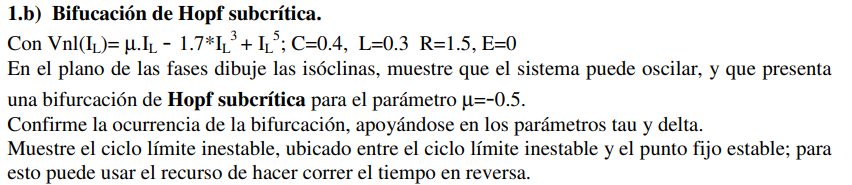

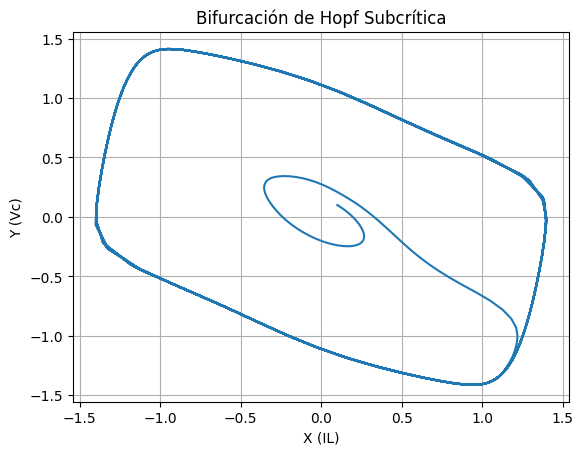

In [ ]:
# Parámetros del sistema
C = 0.4
L = 0.3
R = 1.5
E = 0
mu = -0.5

# Definición de la función no lineal
def Vnl(IL):
    return mu * IL - 1.7 * IL**3 + IL**5

# Sistema de ecuaciones diferenciales
def sistema(t, variables):
    X, Y = variables
    dX_dt = (Y - Vnl(X)) / L
    dY_dt = (E - Y) / (R * C) - X / C
    return [dX_dt, dY_dt]

# Condiciones iniciales
X0 = 0.1
Y0 = 0.1
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

# Solución numérica
sol = solve_ivp(sistema, t_span, [X0, Y0], t_eval=t_eval)

# Gráfico del retrato de fases
plt.figure()
plt.plot(sol.y[0], sol.y[1])
plt.xlabel('X (IL)')
plt.ylabel('Y (Vc)')
plt.title('Bifurcación de Hopf Subcrítica')
plt.grid()
plt.show()

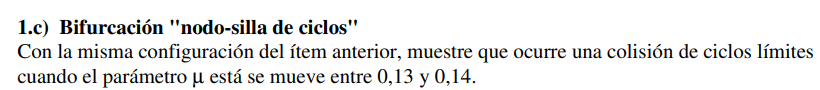

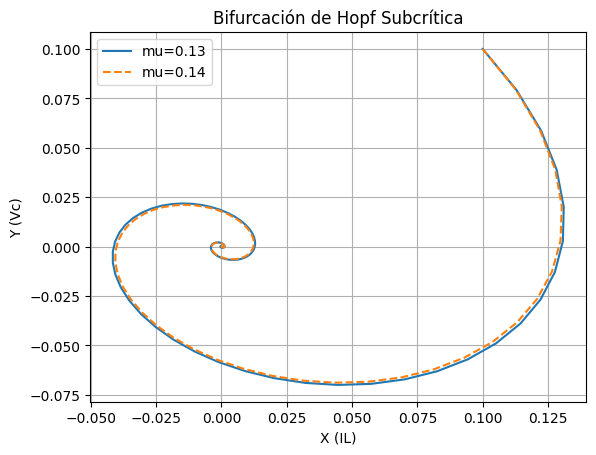

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
C = 0.4
L = 0.3
R = 1.5
E = 0

# Definición de la función no lineal
def Vnl(IL):
    return mu * IL - 1.7 * IL**3 + IL**5

# Sistema de ecuaciones diferenciales
def sistema(t, variables):
    X, Y = variables
    dX_dt = (Y - Vnl(X)) / L
    dY_dt = (E - Y) / (R * C) - X / C
    return [dX_dt, dY_dt]

# Condiciones iniciales
X0 = 0.1
Y0 = 0.1
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

# Solución para mu = 0.13
mu = 0.13
sol1 = solve_ivp(sistema, t_span, [X0, Y0], t_eval=t_eval)

# Solución para mu = 0.14
mu = 0.14
sol2 = solve_ivp(sistema, t_span, [X0, Y0], t_eval=t_eval)


# Gráfico del retrato de fases
plt.figure()
plt.plot(sol1.y[0], sol1.y[1], label='mu=0.13')
plt.plot(sol2.y[0], sol2.y[1], label='mu=0.14', linestyle='--')
plt.xlabel('X (IL)')
plt.ylabel('Y (Vc)')
plt.title('Bifurcación de Hopf Subcrítica')
plt.grid()
plt.legend()
plt.show()

<ipython-input-19-b1af1f967651>:21: RuntimeWarning: overflow encountered in scalar power
  VNL = lambda x: mu*x - 1.7*x**3 + x**5


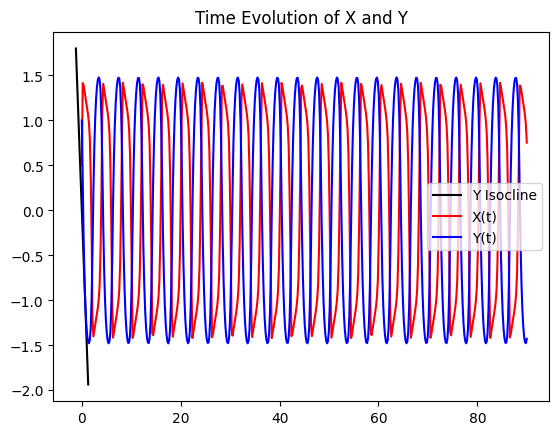

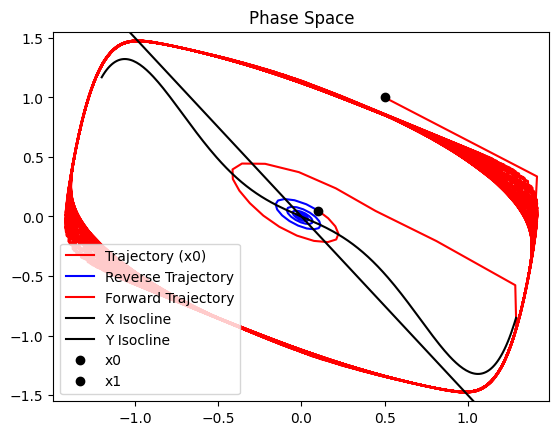

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Simulation time span
span = [0, 90]

# Initial conditions
x0 = np.array([0.5, 1])  # [x_init, y_init]

# Define x range for plotting
x = np.arange(-1.2, 1.3, 0.01)

# Arrow direction (1 for forward time, -1 for reverse time)
flecha = 1

# Hopf Supercritical parameters
mu = -0.6

# Define the nonlinear function VNL
VNL = lambda x: mu*x - 1.7*x**3 + x**5

X_iso = VNL(x)

# Circuit parameters
E = 0
R = 1.5
L = 0.3
C = 0.4

# Threshold
Umbral = -L / (C * R)

# Linear isocline
Yiso = E - x * R

# Plot the isoclines
plt.figure(1)
plt.plot(x, Yiso, 'k', label="Y Isocline")

# Differential equations
deriv_X = lambda t, V: (V[1] - VNL(V[0])) / L
deriv_Y = lambda t, V: (E - V[1]) / (C * R) - V[0] / C

# Solve the system using solve_ivp
def system(t, V, flecha):
    return [flecha * deriv_X(t, V), flecha * deriv_Y(t, V)]

sol = solve_ivp(system, span, x0, args=(flecha,), t_eval=np.linspace(span[0], span[1], 500))

# Plot time evolution
plt.figure(1)
plt.plot(sol.t, sol.y[0], 'r', label="X(t)")
plt.plot(sol.t, sol.y[1], 'b', label="Y(t)")
plt.legend()
plt.title("Time Evolution of X and Y")

# Reverse time simulation
flecha = -1
x1 = np.array([0.1, 0.05])
sol_rev = solve_ivp(system, span, x1, args=(flecha,), t_eval=np.linspace(span[0], span[1], 500))

# Forward time simulation for x1
flecha = 1
sol_fwd = solve_ivp(system, span, x1, args=(flecha,), t_eval=np.linspace(span[0], span[1], 500))

# Phase space plot
plt.figure(2)
plt.plot(sol.y[0], sol.y[1], 'r', label="Trajectory (x0)")
plt.plot(sol_rev.y[0], sol_rev.y[1], 'b', label="Reverse Trajectory")
plt.plot(sol_fwd.y[0], sol_fwd.y[1], 'r', label="Forward Trajectory")
plt.plot(x, X_iso, 'k', label="X Isocline")
plt.plot(x, Yiso, 'k', label="Y Isocline")
plt.plot(x0[0], x0[1], 'ok', label="x0")
plt.plot(x1[0], x1[1], 'ok', label="x1")
plt.legend()
plt.axis([
    1.05 * min(sol.y[0]),
    1.05 * max(sol.y[0]),
    1.05 * min(sol.y[1]),
    1.05 * max(sol.y[1])
])
plt.title("Phase Space")
plt.show()


############################# 2 A SISTEMA EXITABLE A ESTIMULOS SUB Y SUPRAUMBRALES  ######

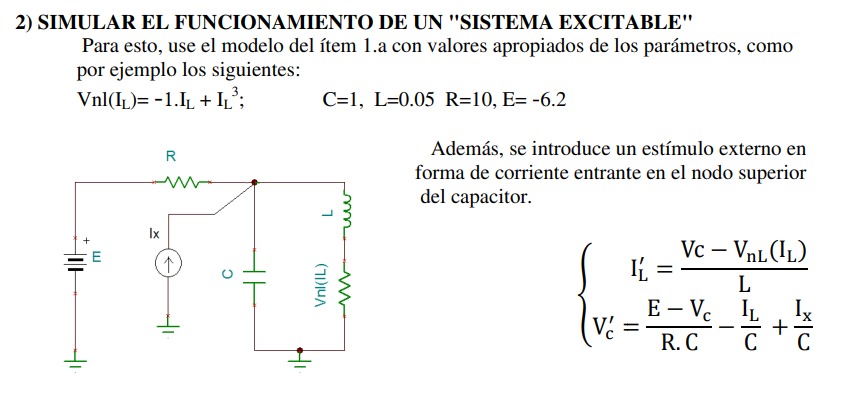

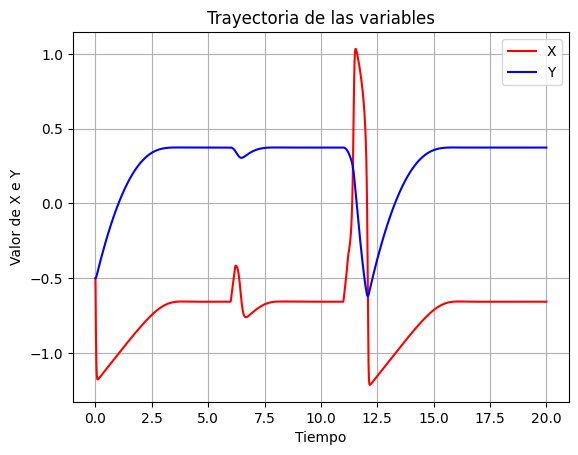

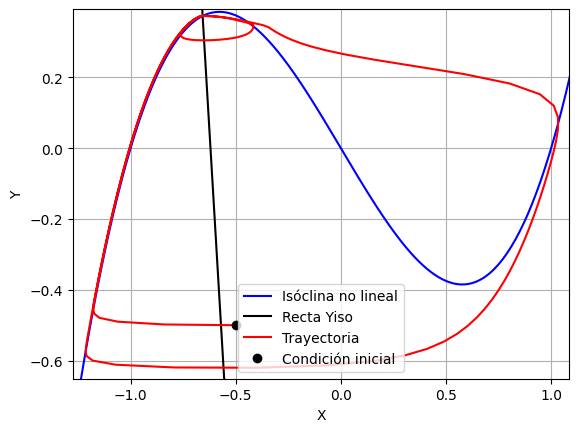

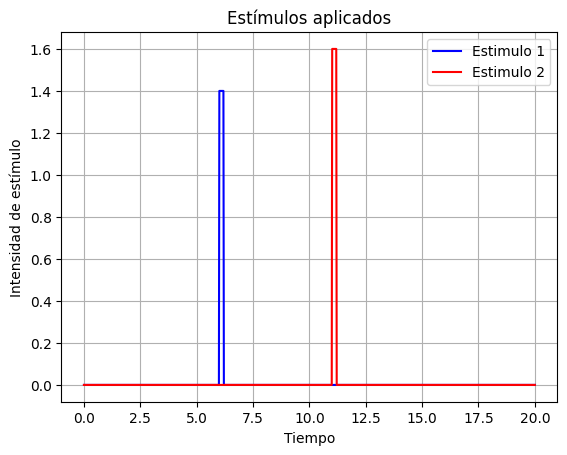

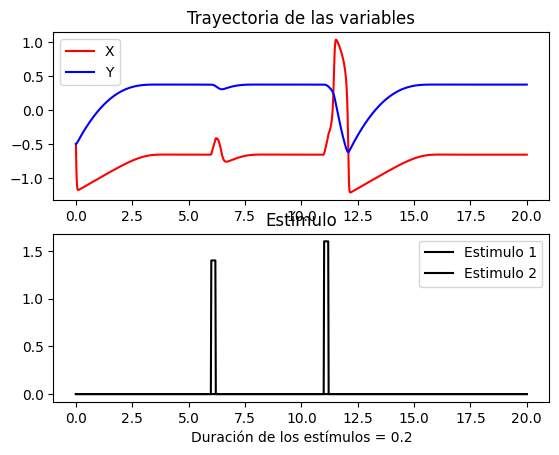

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la simulación
span = [0, 20]  # Tiempo de la simulación
x0 = np.array([-0.5, -0.5])  # Condiciones iniciales

# Parámetros de la isóclina no lineal
mu = 1.0
VNL = lambda x: -mu * x + x**3

x = np.arange(-1.3, 1.31, 0.01)
X_iso = VNL(x)

# Graficar la isóclina
plt.figure(1)
plt.plot(x, X_iso, 'b', label="Isóclina no lineal")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()

# Parámetros de la recta y componentes
E = -6.2
R = 1 / 0.1
L = 0.05
C = 1

Umbral = L / (C * R)
Yiso = E - x * R
plt.plot(x, Yiso, 'k', label="Recta Yiso")

# Parámetros de los pulsos
impulso1, ancho1, posicion1 = 1.4, 0.2, 6
impulso2, ancho2, posicion2 = 1.6, 0.2, 11

# Definir las funciones derivadas
deriv_X = lambda t, V: (V[1] - VNL(V[0])) / L
deriv_Y = lambda t, V: (E - V[1]) / (C * R) - V[0] / C

# Función de estímulos
estimulo1 = lambda t: impulso1 * (np.heaviside(t - posicion1, 1) - np.heaviside(t - posicion1 - ancho1, 1))
estimulo2 = lambda t: impulso2 * (np.heaviside(t - posicion2, 1) - np.heaviside(t - posicion2 - ancho2, 1))

# Definir el sistema de ecuaciones diferenciales
def sistema_diferencial(t, V):
    dx = deriv_X(t, V) + estimulo1(t) + estimulo2(t)
    dy = deriv_Y(t, V) + 0.0001 * (np.random.rand() - 0.5)
    return [dx, dy]

# Resolver la ecuación diferencial
sol = solve_ivp(sistema_diferencial, span, x0, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Graficar X y Y en el tiempo
plt.figure(2)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("Trayectoria de las variables")
plt.xlabel("Tiempo")
plt.ylabel("Valor de X e Y")
plt.grid()

# Ajustar los ejes en la Figura 1
plt.figure(1)
plt.axis([1.05 * min(sol.y[0]), 1.05 * max(sol.y[0]), 1.05 * min(sol.y[1]), 1.05 * max(sol.y[1])])
plt.plot(sol.y[0], sol.y[1], 'r', label="Trayectoria")
plt.plot(x0[0], x0[1], 'ok', label="Condición inicial")
plt.legend()

# Graficar estímulos
disp1 = np.array([estimulo1(t) for t in sol.t])
disp2 = np.array([estimulo2(t) for t in sol.t])

plt.figure(3)
plt.plot(sol.t, disp1, 'b', label="Estimulo 1")
plt.plot(sol.t, disp2, 'r', label="Estimulo 2")
plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Intensidad de estímulo")
plt.title("Estímulos aplicados")
plt.grid()

# Gráficos combinados
plt.figure(4)

plt.subplot(2, 1, 2)
plt.plot(sol.t, disp1, 'k', label="Estimulo 1")
plt.plot(sol.t, disp2, 'k', label="Estimulo 2")
plt.title("Estímulo")
plt.xlabel("Duración de los estímulos = 0.2")
plt.legend()

plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("Trayectoria de las variables")

plt.show()


########### 2_C) Muestre cómo se puede producir un disparo mediante la aplicación de 2 estímulos subumbral
consecutivos  #########

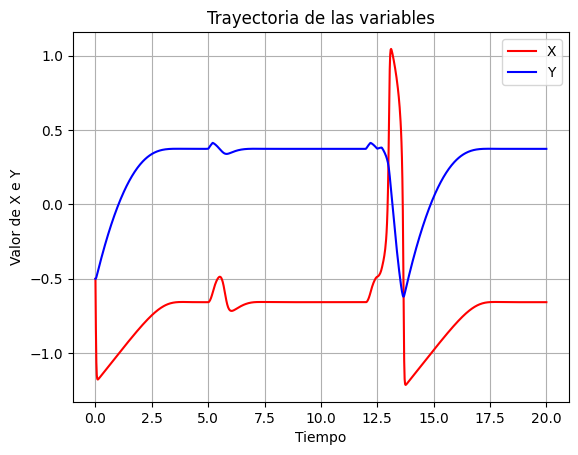

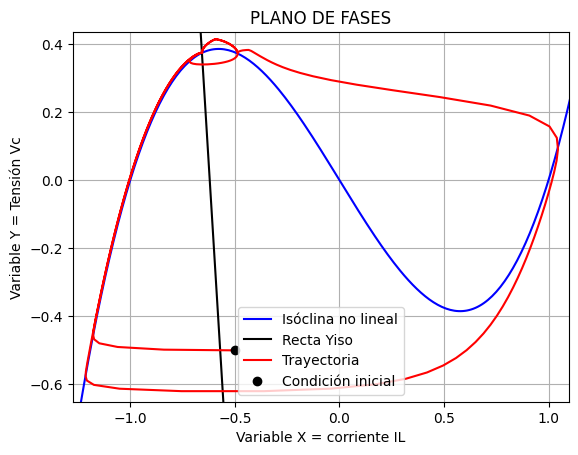

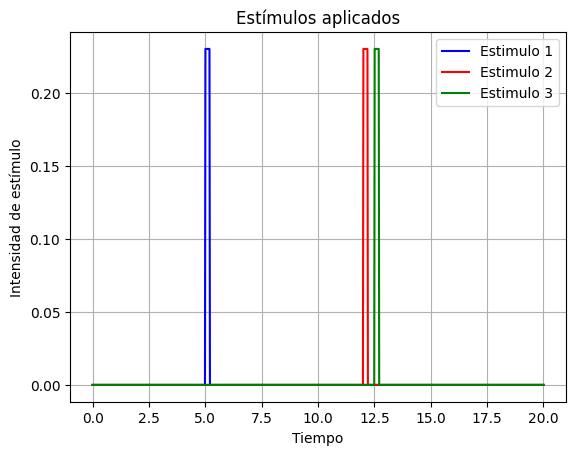

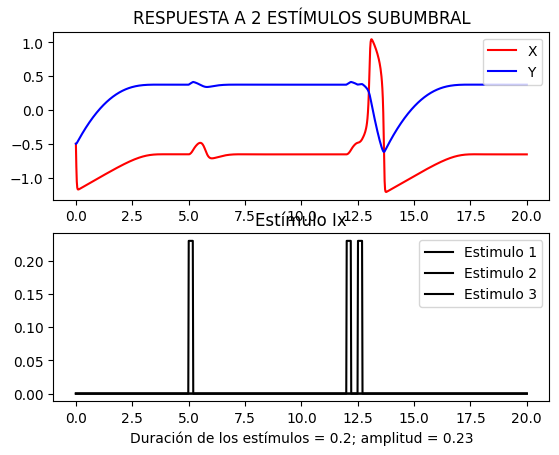

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la simulación
span = [0, 20]  # Tiempo de la simulación
x0 = np.array([-0.5, -0.5])  # Condiciones iniciales

# Parámetros de la isóclina no lineal
mu = 1.0
VNL = lambda x: -mu * x + x**3

x = np.arange(-1.3, 1.31, 0.01)
X_iso = VNL(x)

# Graficar la isóclina
plt.figure(1)
plt.plot(x, X_iso, 'b', label="Isóclina no lineal")

# Parámetros de la recta y componentes
E = -6.2
R = 1 / 0.1
L = 0.05
C = 1

Umbral = L / (C * R)
Yiso = E - x * R
plt.plot(x, Yiso, 'k', label="Recta Yiso")
plt.legend()
plt.grid()

# Parámetros de los pulsos
impulso1, ancho1, posicion1 = 0.23, 0.2, 5
impulso2, ancho2, posicion2 = 0.23, 0.2, 12
impulso3, ancho3, posicion3 = 0.23, 0.2, 12.5

# Definir las funciones derivadas
deriv_X = lambda t, V: (V[1] - VNL(V[0])) / L
deriv_Y = lambda t, V: (E - V[1]) / (C * R) - V[0] / C

# Función de estímulos
estimulo1 = lambda t: impulso1 * (np.heaviside(t - posicion1, 1) - np.heaviside(t - posicion1 - ancho1, 1))
estimulo2 = lambda t: impulso2 * (np.heaviside(t - posicion2, 1) - np.heaviside(t - posicion2 - ancho2, 1))
estimulo3 = lambda t: impulso3 * (np.heaviside(t - posicion3, 1) - np.heaviside(t - posicion3 - ancho3, 1))

# Definir el sistema de ecuaciones diferenciales
def sistema_diferencial(t, V):
    dx = deriv_X(t, V) + 0.001 * (np.random.rand() - 0.5)
    dy = deriv_Y(t, V) + estimulo1(t) + estimulo2(t) + estimulo3(t)
    return [dx, dy]

# Resolver la ecuación diferencial
sol = solve_ivp(sistema_diferencial, span, x0, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Graficar X y Y en el tiempo
plt.figure(2)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("Trayectoria de las variables")
plt.xlabel("Tiempo")
plt.ylabel("Valor de X e Y")
plt.grid()

# Ajustar los ejes en la Figura 1
plt.figure(1)
plt.axis([1.05 * min(sol.y[0]), 1.05 * max(sol.y[0]), 1.05 * min(sol.y[1]), 1.05 * max(sol.y[1])])
plt.plot(sol.y[0], sol.y[1], 'r', label="Trayectoria")
plt.plot(x0[0], x0[1], 'ok', label="Condición inicial")
plt.title("PLANO DE FASES")
plt.xlabel("Variable X = corriente IL")
plt.ylabel("Variable Y = Tensión Vc")
plt.legend()

# Graficar estímulos
disp1 = np.array([estimulo1(t) for t in sol.t])
disp2 = np.array([estimulo2(t) for t in sol.t])
disp3 = np.array([estimulo3(t) for t in sol.t])

plt.figure(3)
plt.plot(sol.t, disp1, 'b', label="Estimulo 1")
plt.plot(sol.t, disp2, 'r', label="Estimulo 2")
plt.plot(sol.t, disp3, 'g', label="Estimulo 3")
plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Intensidad de estímulo")
plt.title("Estímulos aplicados")
plt.grid()

# Gráficos combinados
plt.figure(4)

plt.subplot(2, 1, 2)
plt.plot(sol.t, disp1, 'k', label="Estimulo 1")
plt.plot(sol.t, disp2, 'k', label="Estimulo 2")
plt.plot(sol.t, disp3, 'k', label="Estimulo 3")
plt.title("Estímulo Ix")
plt.xlabel("Duración de los estímulos = 0.2; amplitud = 0.23")
plt.legend()

plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("RESPUESTA A 2 ESTÍMULOS SUBUMBRAL")

plt.show()


ALGUNAS VARIACIONES:

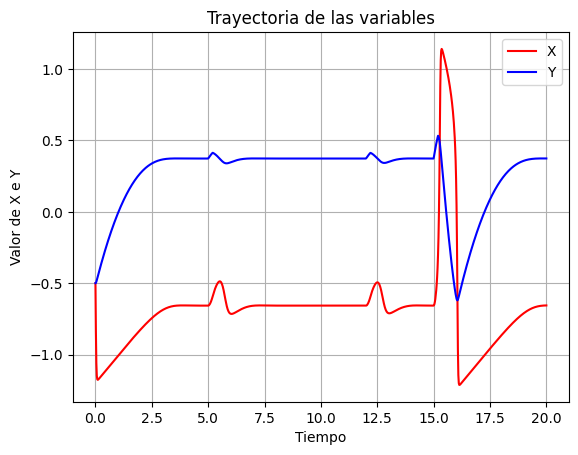

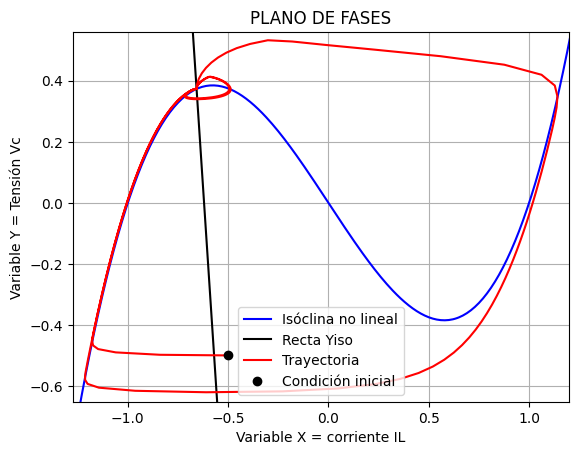

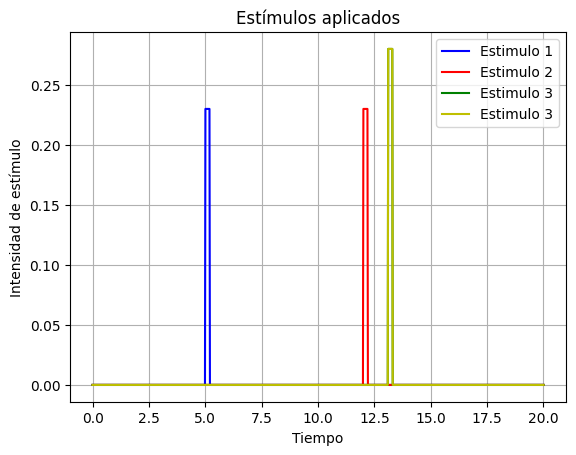

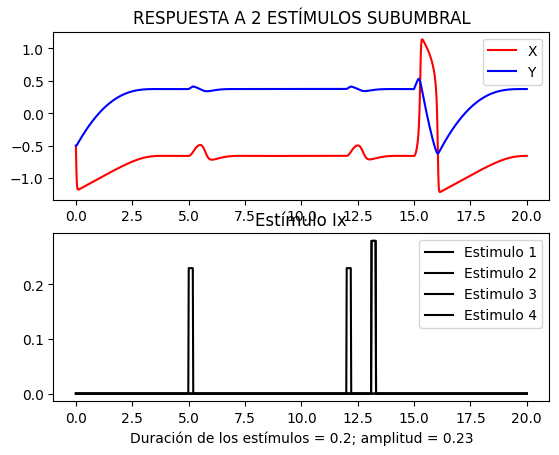

In [ ]:
###aumentando el estimulo para ver q sucede en el plano de las fases###

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la simulación
span = [0, 20]  # Tiempo de la simulación
x0 = np.array([-0.5, -0.5])  # Condiciones iniciales

# Parámetros de la isóclina no lineal
mu = 1.0
VNL = lambda x: -mu * x + x**3

x = np.arange(-1.3, 1.31, 0.01)
X_iso = VNL(x)

# Graficar la isóclina
plt.figure(1)
plt.plot(x, X_iso, 'b', label="Isóclina no lineal")

# Parámetros de la recta y componentes
E = -6.2
R = 1 / 0.1
L = 0.05
C = 1

Umbral = L / (C * R)
Yiso = E - x * R
plt.plot(x, Yiso, 'k', label="Recta Yiso")
plt.legend()
plt.grid()

# Parámetros de los pulsos
impulso1, ancho1, posicion1 = 0.23, 0.2, 5
impulso2, ancho2, posicion2 = 0.23, 0.2, 12
impulso3, ancho3, posicion3 = 0.53, 0.2, 12.5
impulso3, ancho3, posicion3 = 0.93, 0.2, 15


# Definir las funciones derivadas
deriv_X = lambda t, V: (V[1] - VNL(V[0])) / L
deriv_Y = lambda t, V: (E - V[1]) / (C * R) - V[0] / C

# Función de estímulos
estimulo1 = lambda t: impulso1 * (np.heaviside(t - posicion1, 1) - np.heaviside(t - posicion1 - ancho1, 1))
estimulo2 = lambda t: impulso2 * (np.heaviside(t - posicion2, 1) - np.heaviside(t - posicion2 - ancho2, 1))
estimulo3 = lambda t: impulso3 * (np.heaviside(t - posicion3, 1) - np.heaviside(t - posicion3 - ancho3, 1))
estimulo4 = lambda t: impulso4 * (np.heaviside(t - posicion4, 1) - np.heaviside(t - posicion4 - ancho4, 1))


# Definir el sistema de ecuaciones diferenciales
def sistema_diferencial(t, V):
    dx = deriv_X(t, V) + 0.001 * (np.random.rand() - 0.5)
    dy = deriv_Y(t, V) + estimulo1(t) + estimulo2(t) + estimulo3(t)
    return [dx, dy]

# Resolver la ecuación diferencial
sol = solve_ivp(sistema_diferencial, span, x0, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Graficar X y Y en el tiempo
plt.figure(2)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("Trayectoria de las variables")
plt.xlabel("Tiempo")
plt.ylabel("Valor de X e Y")
plt.grid()

# Ajustar los ejes en la Figura 1
plt.figure(1)
plt.axis([1.05 * min(sol.y[0]), 1.05 * max(sol.y[0]), 1.05 * min(sol.y[1]), 1.05 * max(sol.y[1])])
plt.plot(sol.y[0], sol.y[1], 'r', label="Trayectoria")
plt.plot(x0[0], x0[1], 'ok', label="Condición inicial")
plt.title("PLANO DE FASES")
plt.xlabel("Variable X = corriente IL")
plt.ylabel("Variable Y = Tensión Vc")
plt.legend()

# Graficar estímulos
disp1 = np.array([estimulo1(t) for t in sol.t])
disp2 = np.array([estimulo2(t) for t in sol.t])
disp3 = np.array([estimulo3(t) for t in sol.t])
disp3 = np.array([estimulo4(t) for t in sol.t])


plt.figure(3)
plt.plot(sol.t, disp1, 'b', label="Estimulo 1")
plt.plot(sol.t, disp2, 'r', label="Estimulo 2")
plt.plot(sol.t, disp3, 'g', label="Estimulo 3")
plt.plot(sol.t, disp4, 'y', label="Estimulo 4")

plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Intensidad de estímulo")
plt.title("Estímulos aplicados")
plt.grid()

# Gráficos combinados
plt.figure(4)

plt.subplot(2, 1, 2)
plt.plot(sol.t, disp1, 'k', label="Estimulo 1")
plt.plot(sol.t, disp2, 'k', label="Estimulo 2")
plt.plot(sol.t, disp3, 'k', label="Estimulo 3")
plt.plot(sol.t, disp4, 'k', label="Estimulo 4")

plt.title("Estímulo Ix")
plt.xlabel("Duración de los estímulos = 0.2; amplitud = 0.23")
plt.legend()

plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("RESPUESTA A 2 ESTÍMULOS SUBUMBRAL")

plt.show()


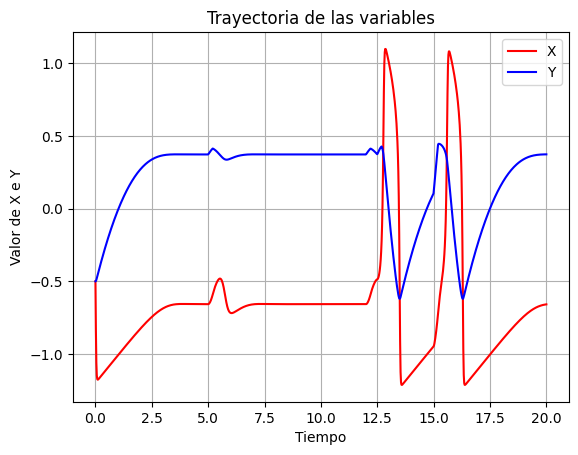

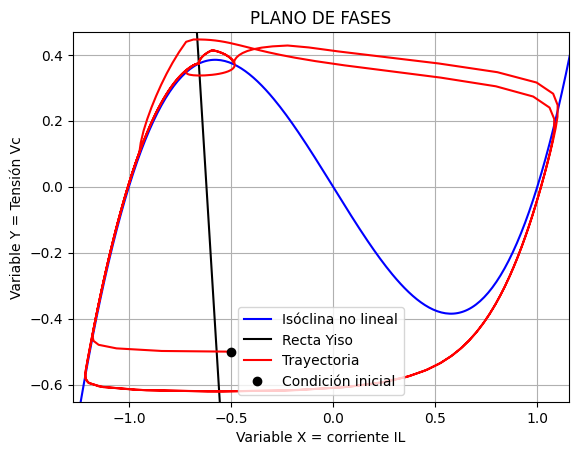

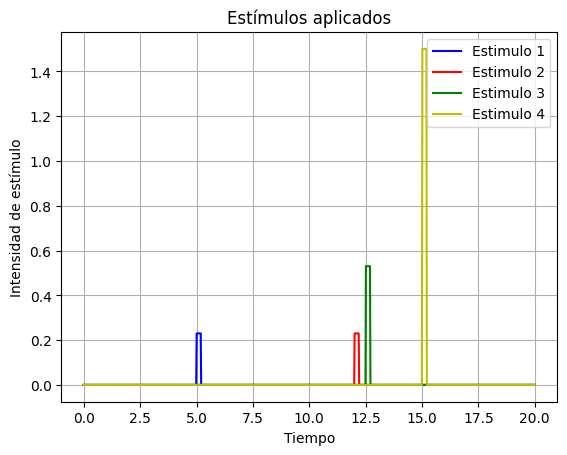

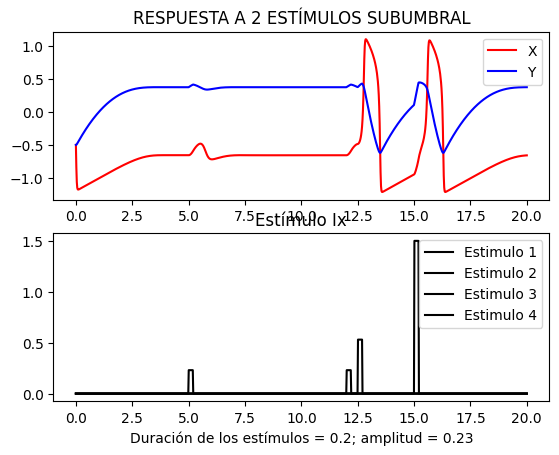

In [ ]:
###creando un cuarto estimulo antes del punto fijo lo suficiente mente grande como para que empiece el ciclo##

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la simulación
span = [0, 20]  # Tiempo de la simulación
x0 = np.array([-0.5, -0.5])  # Condiciones iniciales

# Parámetros de la isóclina no lineal
mu = 1.0
VNL = lambda x: -mu * x + x**3

x = np.arange(-1.3, 1.31, 0.01)
X_iso = VNL(x)

# Graficar la isóclina
plt.figure(1)
plt.plot(x, X_iso, 'b', label="Isóclina no lineal")

# Parámetros de la recta y componentes
E = -6.2
R = 1 / 0.1
L = 0.05
C = 1

Umbral = L / (C * R)
Yiso = E - x * R
plt.plot(x, Yiso, 'k', label="Recta Yiso")
plt.legend()
plt.grid()

# Parámetros de los pulsos
impulso1, ancho1, posicion1 = 0.23, 0.2, 5
impulso2, ancho2, posicion2 = 0.23, 0.2, 12
impulso3, ancho3, posicion3 = 0.53, 0.2, 12.5
impulso4, ancho4, posicion4 = 1.5, 0.2, 15


# Definir las funciones derivadas
deriv_X = lambda t, V: (V[1] - VNL(V[0])) / L
deriv_Y = lambda t, V: (E - V[1]) / (C * R) - V[0] / C

# Función de estímulos
estimulo1 = lambda t: impulso1 * (np.heaviside(t - posicion1, 1) - np.heaviside(t - posicion1 - ancho1, 1))
estimulo2 = lambda t: impulso2 * (np.heaviside(t - posicion2, 1) - np.heaviside(t - posicion2 - ancho2, 1))
estimulo3 = lambda t: impulso3 * (np.heaviside(t - posicion3, 1) - np.heaviside(t - posicion3 - ancho3, 1))
estimulo4 = lambda t: impulso4 * (np.heaviside(t - posicion4, 1) - np.heaviside(t - posicion4 - ancho4, 1))


# Definir el sistema de ecuaciones diferenciales
def sistema_diferencial(t, V):
    dx = deriv_X(t, V) + 0.001 * (np.random.rand() - 0.5)
    dy = deriv_Y(t, V) + estimulo1(t) + estimulo2(t) + estimulo3(t) + estimulo4(t)
    return [dx, dy]

# Resolver la ecuación diferencial
sol = solve_ivp(sistema_diferencial, span, x0, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Graficar X y Y en el tiempo
plt.figure(2)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("Trayectoria de las variables")
plt.xlabel("Tiempo")
plt.ylabel("Valor de X e Y")
plt.grid()

# Ajustar los ejes en la Figura 1
plt.figure(1)
plt.axis([1.05 * min(sol.y[0]), 1.05 * max(sol.y[0]), 1.05 * min(sol.y[1]), 1.05 * max(sol.y[1])])
plt.plot(sol.y[0], sol.y[1], 'r', label="Trayectoria")
plt.plot(x0[0], x0[1], 'ok', label="Condición inicial")
plt.title("PLANO DE FASES")
plt.xlabel("Variable X = corriente IL")
plt.ylabel("Variable Y = Tensión Vc")
plt.legend()

# Graficar estímulos
disp1 = np.array([estimulo1(t) for t in sol.t])
disp2 = np.array([estimulo2(t) for t in sol.t])
disp3 = np.array([estimulo3(t) for t in sol.t])
disp4 = np.array([estimulo4(t) for t in sol.t])


plt.figure(3)
plt.plot(sol.t, disp1, 'b', label="Estimulo 1")
plt.plot(sol.t, disp2, 'r', label="Estimulo 2")
plt.plot(sol.t, disp3, 'g', label="Estimulo 3")
plt.plot(sol.t, disp4, 'y', label="Estimulo 4")

plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Intensidad de estímulo")
plt.title("Estímulos aplicados")
plt.grid()

# Gráficos combinados
plt.figure(4)

plt.subplot(2, 1, 2)
plt.plot(sol.t, disp1, 'k', label="Estimulo 1")
plt.plot(sol.t, disp2, 'k', label="Estimulo 2")
plt.plot(sol.t, disp3, 'k', label="Estimulo 3")
plt.plot(sol.t, disp4, 'k', label="Estimulo 4")

plt.title("Estímulo Ix")
plt.xlabel("Duración de los estímulos = 0.2; amplitud = 0.23")
plt.legend()

plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("RESPUESTA A 2 ESTÍMULOS SUBUMBRAL cambiando la amplitud del estimulo a uno muy alto")

plt.show()


############## 2D) Zona refractaria ###############

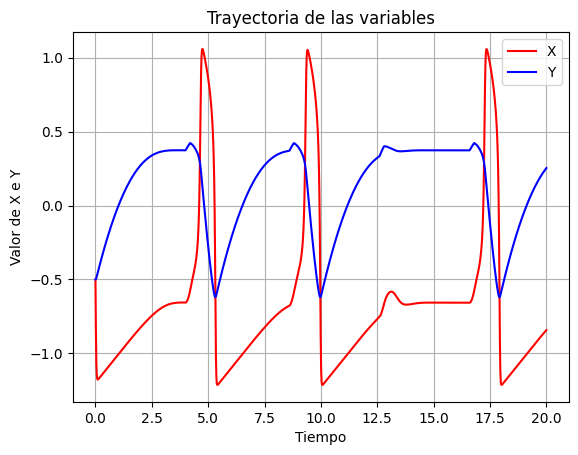

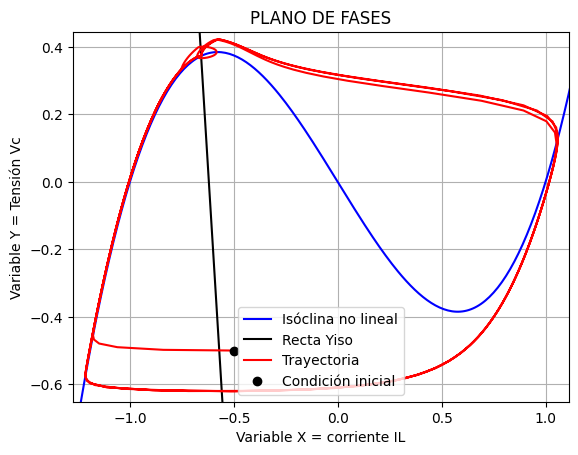

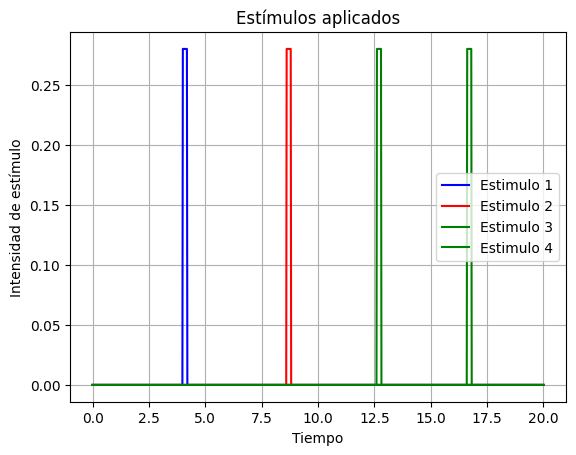

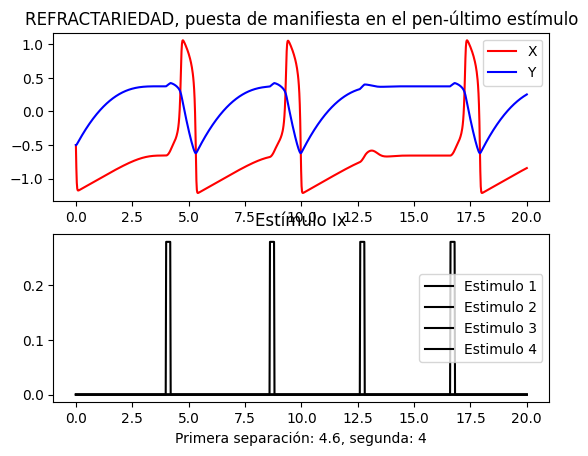

In [ ]:
###2c zona refractaria CON VALOR NORMAL DE AMPLITUD
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la simulación
span = [0, 20]  # Tiempo de la simulación
x0 = np.array([-0.5, -0.5])  # Condiciones iniciales

# Parámetros de la isóclina no lineal
mu = 1.0
VNL = lambda x: -mu * x + x**3

x = np.arange(-1.3, 1.31, 0.01)
X_iso = VNL(x)

# Graficar la isóclina
plt.figure(1)
plt.plot(x, X_iso, 'b', label="Isóclina no lineal")

# Parámetros de la recta y componentes
E = -6.2
R = 1 / 0.1
L = 0.05
C = 1

Umbral = L / (C * R)
Yiso = E - x * R
plt.plot(x, Yiso, 'k', label="Recta Yiso")
plt.legend()
plt.grid()

# Parámetros de los pulsos
impulso1, ancho1, posicion1 = 0.28, 0.2, 4
impulso2, ancho2, posicion2 = 0.28, 0.2, posicion1 + 4.6
impulso3, ancho3, posicion3 = 0.28, 0.2, posicion2 + 4
impulso4, ancho4, posicion4 = 0.28, 0.2, posicion3 + 4

# Definir las funciones derivadas
deriv_X = lambda t, V: (V[1] - VNL(V[0])) / L
deriv_Y = lambda t, V: (E - V[1]) / (C * R) - V[0] / C

# Función de estímulos
estimulo1 = lambda t: impulso1 * (np.heaviside(t - posicion1, 1) - np.heaviside(t - posicion1 - ancho1, 1))
estimulo2 = lambda t: impulso2 * (np.heaviside(t - posicion2, 1) - np.heaviside(t - posicion2 - ancho2, 1))
estimulo3 = lambda t: impulso3 * (np.heaviside(t - posicion3, 1) - np.heaviside(t - posicion3 - ancho3, 1))
estimulo4 = lambda t: impulso4 * (np.heaviside(t - posicion4, 1) - np.heaviside(t - posicion4 - ancho4, 1))


# Definir el sistema de ecuaciones diferenciales
def sistema_diferencial(t, V):
    dx = deriv_X(t, V) + 0.001 * (np.random.rand() - 0.5)
    dy = deriv_Y(t, V) + estimulo1(t) + estimulo2(t) + estimulo3(t) + estimulo4(t)
    return [dx, dy]

# Resolver la ecuación diferencial
sol = solve_ivp(sistema_diferencial, span, x0, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Graficar X y Y en el tiempo
plt.figure(2)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("Trayectoria de las variables")
plt.xlabel("Tiempo")
plt.ylabel("Valor de X e Y")
plt.grid()

# Ajustar los ejes en la Figura 1
plt.figure(1)
plt.axis([1.05 * min(sol.y[0]), 1.05 * max(sol.y[0]), 1.05 * min(sol.y[1]), 1.05 * max(sol.y[1])])
plt.plot(sol.y[0], sol.y[1], 'r', label="Trayectoria")
plt.plot(x0[0], x0[1], 'ok', label="Condición inicial")
plt.title("PLANO DE FASES")
plt.xlabel("Variable X = corriente IL")
plt.ylabel("Variable Y = Tensión Vc")
plt.legend()

# Graficar estímulos
disp1 = np.array([estimulo1(t) for t in sol.t])
disp2 = np.array([estimulo2(t) for t in sol.t])
disp3 = np.array([estimulo3(t) for t in sol.t])
disp4 = np.array([estimulo4(t) for t in sol.t])

plt.figure(3)
plt.plot(sol.t, disp1, 'b', label="Estimulo 1")
plt.plot(sol.t, disp2, 'r', label="Estimulo 2")
plt.plot(sol.t, disp3, 'g', label="Estimulo 3")
plt.plot(sol.t, disp4, 'g', label="Estimulo 4")

plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Intensidad de estímulo")
plt.title("Estímulos aplicados")
plt.grid()

# Gráficos combinados
plt.figure(4)

plt.subplot(2, 1, 2)
plt.plot(sol.t, disp1, 'k', label="Estimulo 1")
plt.plot(sol.t, disp2, 'k', label="Estimulo 2")
plt.plot(sol.t, disp3, 'k', label="Estimulo 3")
plt.plot(sol.t, disp4, 'k', label="Estimulo 4")

plt.title("Estímulo Ix")
plt.xlabel("Primera separación: 4.6, segunda: 4")
plt.legend()

plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("REFRACTARIEDAD, puesta de manifiesta en el pen-último estímulo")

plt.show()


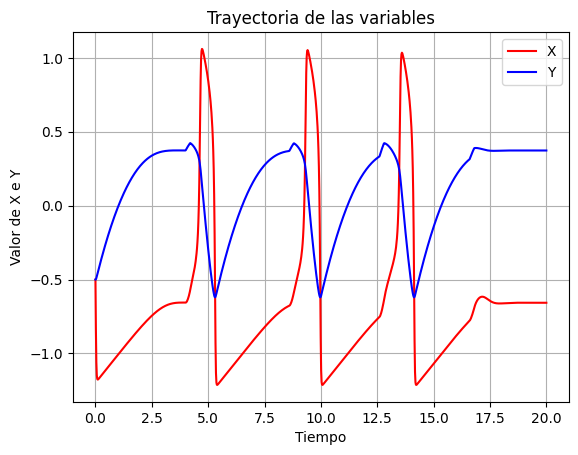

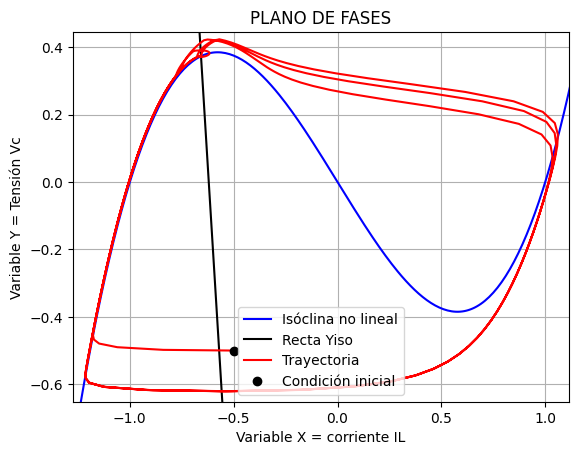

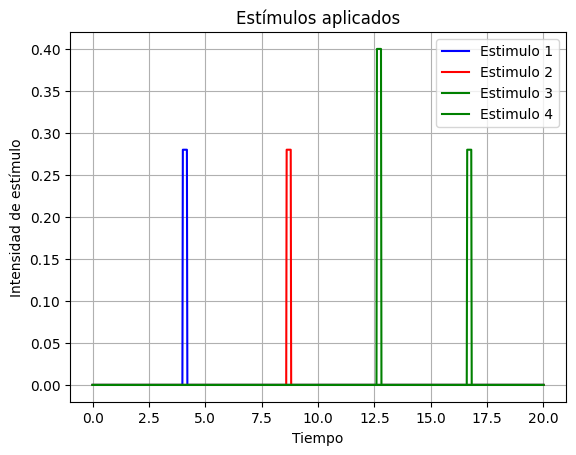

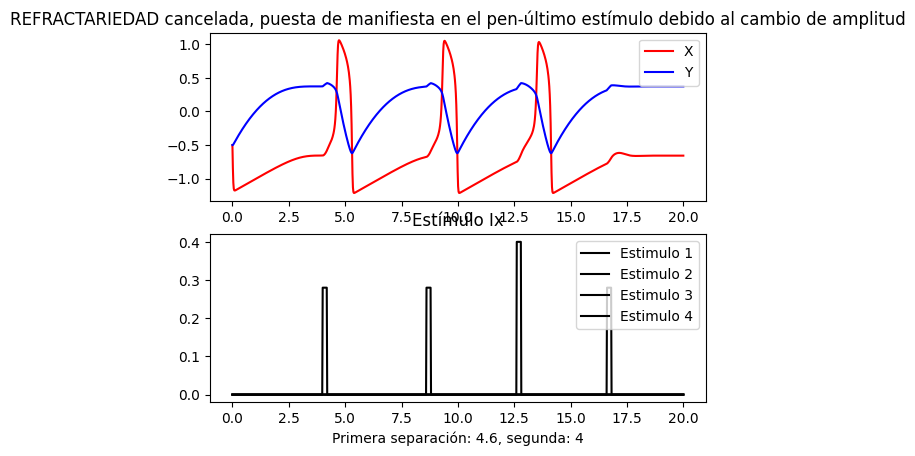

In [ ]:
###2c zona refractaria CON VALOR ALTO DE AMPLITUD PARA DENOTAR Q LA ZONA DEPENDE DE LA SUPERFICIE DEL IMPULSO OTORGADO###

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la simulación
span = [0, 20]  # Tiempo de la simulación
x0 = np.array([-0.5, -0.5])  # Condiciones iniciales

# Parámetros de la isóclina no lineal
mu = 1.0
VNL = lambda x: -mu * x + x**3

x = np.arange(-1.3, 1.31, 0.01)
X_iso = VNL(x)

# Graficar la isóclina
plt.figure(1)
plt.plot(x, X_iso, 'b', label="Isóclina no lineal")

# Parámetros de la recta y componentes
E = -6.2
R = 1 / 0.1
L = 0.05
C = 1

Umbral = L / (C * R)
Yiso = E - x * R
plt.plot(x, Yiso, 'k', label="Recta Yiso")
plt.legend()
plt.grid()

# Parámetros de los pulsos
impulso1, ancho1, posicion1 = 0.28, 0.2, 4
impulso2, ancho2, posicion2 = 0.28, 0.2, posicion1 + 4.6
impulso3, ancho3, posicion3 = 0.40, 0.2, posicion2 + 4
impulso4, ancho4, posicion4 = 0.28, 0.2, posicion3 + 4

# Definir las funciones derivadas
deriv_X = lambda t, V: (V[1] - VNL(V[0])) / L
deriv_Y = lambda t, V: (E - V[1]) / (C * R) - V[0] / C

# Función de estímulos
estimulo1 = lambda t: impulso1 * (np.heaviside(t - posicion1, 1) - np.heaviside(t - posicion1 - ancho1, 1))
estimulo2 = lambda t: impulso2 * (np.heaviside(t - posicion2, 1) - np.heaviside(t - posicion2 - ancho2, 1))
estimulo3 = lambda t: impulso3 * (np.heaviside(t - posicion3, 1) - np.heaviside(t - posicion3 - ancho3, 1))
estimulo4 = lambda t: impulso4 * (np.heaviside(t - posicion4, 1) - np.heaviside(t - posicion4 - ancho4, 1))


# Definir el sistema de ecuaciones diferenciales
def sistema_diferencial(t, V):
    dx = deriv_X(t, V) + 0.001 * (np.random.rand() - 0.5)
    dy = deriv_Y(t, V) + estimulo1(t) + estimulo2(t) + estimulo3(t) + estimulo4(t)
    return [dx, dy]

# Resolver la ecuación diferencial
sol = solve_ivp(sistema_diferencial, span, x0, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Graficar X y Y en el tiempo
plt.figure(2)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("Trayectoria de las variables")
plt.xlabel("Tiempo")
plt.ylabel("Valor de X e Y")
plt.grid()

# Ajustar los ejes en la Figura 1
plt.figure(1)
plt.axis([1.05 * min(sol.y[0]), 1.05 * max(sol.y[0]), 1.05 * min(sol.y[1]), 1.05 * max(sol.y[1])])
plt.plot(sol.y[0], sol.y[1], 'r', label="Trayectoria")
plt.plot(x0[0], x0[1], 'ok', label="Condición inicial")
plt.title("PLANO DE FASES")
plt.xlabel("Variable X = corriente IL")
plt.ylabel("Variable Y = Tensión Vc")
plt.legend()

# Graficar estímulos
disp1 = np.array([estimulo1(t) for t in sol.t])
disp2 = np.array([estimulo2(t) for t in sol.t])
disp3 = np.array([estimulo3(t) for t in sol.t])
disp4 = np.array([estimulo4(t) for t in sol.t])

plt.figure(3)
plt.plot(sol.t, disp1, 'b', label="Estimulo 1")
plt.plot(sol.t, disp2, 'r', label="Estimulo 2")
plt.plot(sol.t, disp3, 'g', label="Estimulo 3")
plt.plot(sol.t, disp4, 'g', label="Estimulo 4")

plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Intensidad de estímulo")
plt.title("Estímulos aplicados")
plt.grid()

# Gráficos combinados
plt.figure(4)

plt.subplot(2, 1, 2)
plt.plot(sol.t, disp1, 'k', label="Estimulo 1")
plt.plot(sol.t, disp2, 'k', label="Estimulo 2")
plt.plot(sol.t, disp3, 'k', label="Estimulo 3")
plt.plot(sol.t, disp4, 'k', label="Estimulo 4")

plt.title("Estímulo Ix")
plt.xlabel("Primera separación: 4.6, segunda: 4")
plt.legend()

plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("refractaridad cancelada, en el penultimo estimulo")

plt.show()



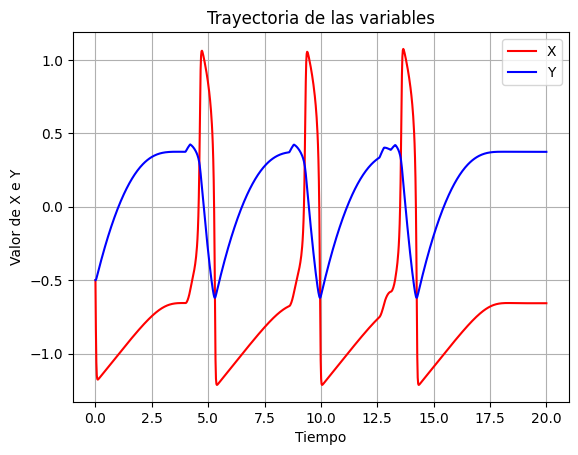

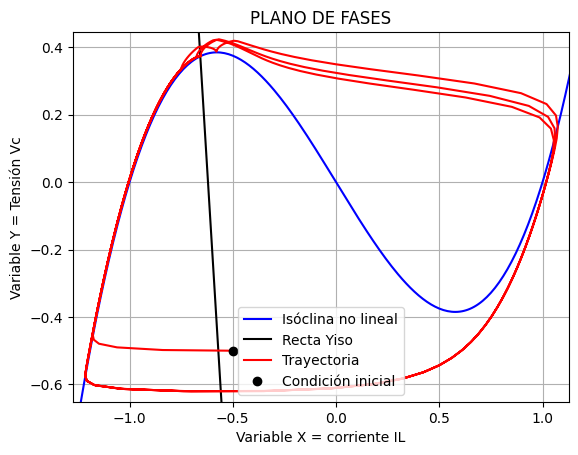

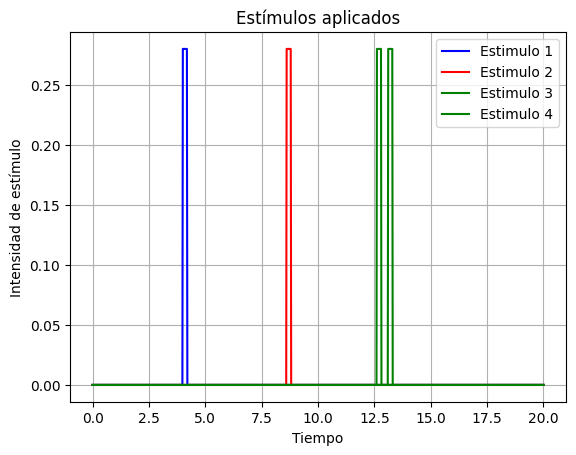

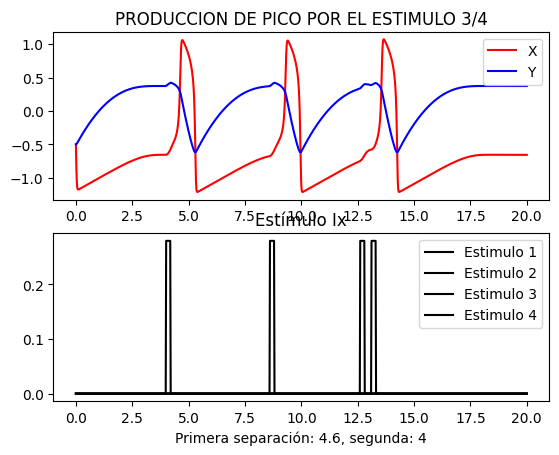

In [ ]:
###2c zona refractaria 2 ESTIMULOS
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la simulación
span = [0, 20]  # Tiempo de la simulación
x0 = np.array([-0.5, -0.5])  # Condiciones iniciales

# Parámetros de la isóclina no lineal
mu = 1.0
VNL = lambda x: -mu * x + x**3

x = np.arange(-1.3, 1.31, 0.01)
X_iso = VNL(x)

# Graficar la isóclina
plt.figure(1)
plt.plot(x, X_iso, 'b', label="Isóclina no lineal")

# Parámetros de la recta y componentes
E = -6.2
R = 1 / 0.1
L = 0.05
C = 1

Umbral = L / (C * R)
Yiso = E - x * R
plt.plot(x, Yiso, 'k', label="Recta Yiso")
plt.legend()
plt.grid()

# Parámetros de los pulsos
impulso1, ancho1, posicion1 = 0.28, 0.2, 4
impulso2, ancho2, posicion2 = 0.28, 0.2, posicion1 + 4.6
impulso3, ancho3, posicion3 = 0.28, 0.2, posicion2 + 4
impulso4, ancho4, posicion4 = 0.28, 0.2, posicion3 + 0.5

# Definir las funciones derivadas
deriv_X = lambda t, V: (V[1] - VNL(V[0])) / L
deriv_Y = lambda t, V: (E - V[1]) / (C * R) - V[0] / C

# Función de estímulos
estimulo1 = lambda t: impulso1 * (np.heaviside(t - posicion1, 1) - np.heaviside(t - posicion1 - ancho1, 1))
estimulo2 = lambda t: impulso2 * (np.heaviside(t - posicion2, 1) - np.heaviside(t - posicion2 - ancho2, 1))
estimulo3 = lambda t: impulso3 * (np.heaviside(t - posicion3, 1) - np.heaviside(t - posicion3 - ancho3, 1))
estimulo4 = lambda t: impulso4 * (np.heaviside(t - posicion4, 1) - np.heaviside(t - posicion4 - ancho4, 1))


# Definir el sistema de ecuaciones diferenciales
def sistema_diferencial(t, V):
    dx = deriv_X(t, V) + 0.001 * (np.random.rand() - 0.5)
    dy = deriv_Y(t, V) + estimulo1(t) + estimulo2(t) + estimulo3(t) + estimulo4(t)
    return [dx, dy]

# Resolver la ecuación diferencial
sol = solve_ivp(sistema_diferencial, span, x0, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Graficar X y Y en el tiempo
plt.figure(2)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("Trayectoria de las variables")
plt.xlabel("Tiempo")
plt.ylabel("Valor de X e Y")
plt.grid()

# Ajustar los ejes en la Figura 1
plt.figure(1)
plt.axis([1.05 * min(sol.y[0]), 1.05 * max(sol.y[0]), 1.05 * min(sol.y[1]), 1.05 * max(sol.y[1])])
plt.plot(sol.y[0], sol.y[1], 'r', label="Trayectoria")
plt.plot(x0[0], x0[1], 'ok', label="Condición inicial")
plt.title("PLANO DE FASES")
plt.xlabel("Variable X = corriente IL")
plt.ylabel("Variable Y = Tensión Vc")
plt.legend()

# Graficar estímulos
disp1 = np.array([estimulo1(t) for t in sol.t])
disp2 = np.array([estimulo2(t) for t in sol.t])
disp3 = np.array([estimulo3(t) for t in sol.t])
disp4 = np.array([estimulo4(t) for t in sol.t])

plt.figure(3)
plt.plot(sol.t, disp1, 'b', label="Estimulo 1")
plt.plot(sol.t, disp2, 'r', label="Estimulo 2")
plt.plot(sol.t, disp3, 'g', label="Estimulo 3")
plt.plot(sol.t, disp4, 'g', label="Estimulo 4")

plt.legend()
plt.xlabel("Tiempo")
plt.ylabel("Intensidad de estímulo")
plt.title("Estímulos aplicados")
plt.grid()

# Gráficos combinados
plt.figure(4)

plt.subplot(2, 1, 2)
plt.plot(sol.t, disp1, 'k', label="Estimulo 1")
plt.plot(sol.t, disp2, 'k', label="Estimulo 2")
plt.plot(sol.t, disp3, 'k', label="Estimulo 3")
plt.plot(sol.t, disp4, 'k', label="Estimulo 4")

plt.title("Estímulo Ix")
plt.xlabel("Primera separación: 4.6, segunda: 4")
plt.legend()

plt.subplot(2, 1, 1)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("PRODUCCION DE PICO POR EL ESTIMULO 3-4")

plt.show()

Se puede ver que producir un estimulo lo suficientemente grande en amplitud o ancho asi como agregar otros estimulos un poco despues puede evitar el efecto de la zona y si producir un pico

########## D)  bifurcación, pasando
el sistema de ser excitable a ser un oscilador.  #####################

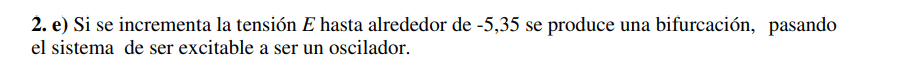

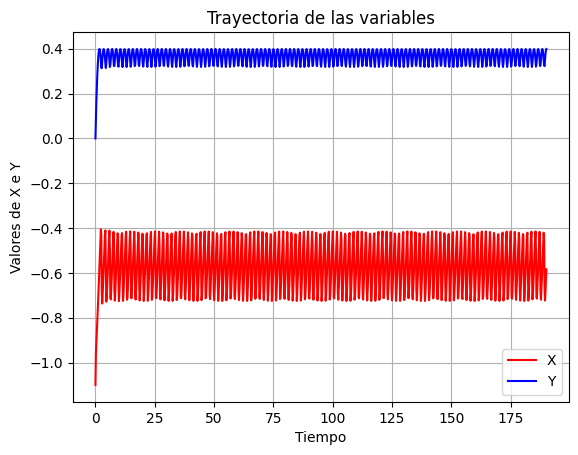

In [ ]:
##con E=-0,35 ES OSCILATORIO amplitud fija

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la simulación
span = [0, 190]  # Tiempo de la simulación
x0 = np.array([-1.1, 0])  # Condiciones iniciales
x1 = np.array([0.1, 0.05])  # Segunda condición inicial

# Parámetros de la isóclina no lineal
mu = 1
VNL = lambda x: -mu * x + x**3

x = np.arange(-1.2, 1.31, 0.01)
X_iso = VNL(x)

# Parámetros de la recta y componentes
E = -5.35
R = 1 / 0.1
L = 0.05
C = 1

Umbral = -L / (C * R)
Yiso = E - x * R

# Definir las funciones derivadas
deriv_X = lambda t, V: (V[1] - VNL(V[0])) / L
deriv_Y = lambda t, V: (E - V[1]) / (C * R) - V[0] / C

# Resolver el sistema de ecuaciones diferenciales para x0 (flecha = 1)
flecha = 1
def sistema_diferencial(t, V):
    dx = flecha * deriv_X(t, V)
    dy = flecha * deriv_Y(t, V)
    return [dx, dy]

sol = solve_ivp(sistema_diferencial, span, x0, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Resolver el sistema para x1 en reversa (flecha = -1)
flecha = -1
sol_reverso = solve_ivp(sistema_diferencial, span, x1, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Resolver el sistema para x1 en avance (flecha = 1)
flecha = 1
sol_directo = solve_ivp(sistema_diferencial, span, x1, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Gráfico de las variables X y Y en el tiempo
plt.figure(1)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("Trayectoria de las variables")
plt.xlabel("Tiempo")
plt.ylabel("Valores de X e Y")
plt.grid()


plt.show()


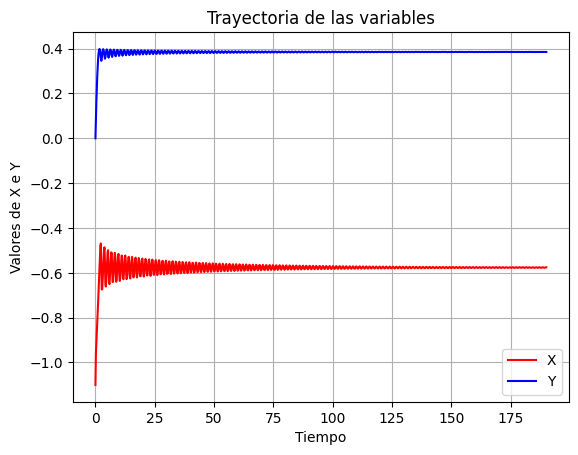

In [ ]:
##con E=-0,38 Oscilatorio decayente

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros de la simulación
span = [0, 190]  # Tiempo de la simulación
x0 = np.array([-1.1, 0])  # Condiciones iniciales
x1 = np.array([0.1, 0.05])  # Segunda condición inicial

# Parámetros de la isóclina no lineal
mu = 1
VNL = lambda x: -mu * x + x**3

x = np.arange(-1.2, 1.31, 0.01)
X_iso = VNL(x)

# Parámetros de la recta y componentes
E = -5.38
R = 1 / 0.1
L = 0.05
C = 1

Umbral = -L / (C * R)
Yiso = E - x * R

# Definir las funciones derivadas
deriv_X = lambda t, V: (V[1] - VNL(V[0])) / L
deriv_Y = lambda t, V: (E - V[1]) / (C * R) - V[0] / C

# Resolver el sistema de ecuaciones diferenciales para x0 (flecha = 1)
flecha = 1
def sistema_diferencial(t, V):
    dx = flecha * deriv_X(t, V)
    dy = flecha * deriv_Y(t, V)
    return [dx, dy]

sol = solve_ivp(sistema_diferencial, span, x0, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Resolver el sistema para x1 en reversa (flecha = -1)
flecha = -1
sol_reverso = solve_ivp(sistema_diferencial, span, x1, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Resolver el sistema para x1 en avance (flecha = 1)
flecha = 1
sol_directo = solve_ivp(sistema_diferencial, span, x1, method='RK45', rtol=1e-5, t_eval=np.linspace(span[0], span[1], 1000))

# Gráfico de las variables X y Y en el tiempo
plt.figure(1)
plt.plot(sol.t, sol.y[0], 'r', label="X")
plt.plot(sol.t, sol.y[1], 'b', label="Y")
plt.legend()
plt.title("Trayectoria de las variables")
plt.xlabel("Tiempo")
plt.ylabel("Valores de X e Y")
plt.grid()


plt.show()


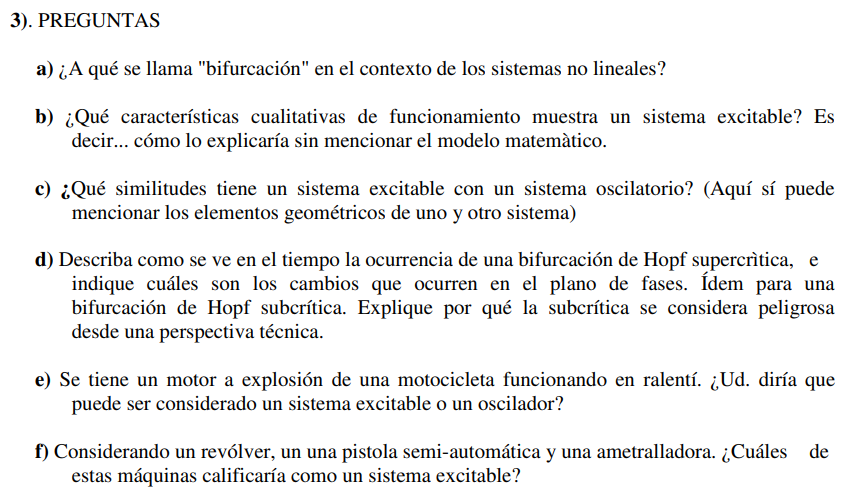



---

### a)
 Bifurcación en sistemas no lineales:  
Una bifurcación ocurre cuando un pequeño cambio en un parámetro del sistema no lineal provoca un cambio cualitativo en su comportamiento dinámico. Este fenómeno puede manifestarse de diversas formas, como la aparición o desaparición de puntos de equilibrio, la alteración de su estabilidad o la emergencia de ciclos límite (oscilaciones sostenidas). En términos matemáticos, representa un umbral crítico donde la estructura de las soluciones del sistema se reorganiza abruptamente.  

---

### b)
Características de un sistema excitable  
Un sistema excitable se caracteriza por:  

- **Estado de reposo estable**: En ausencia de perturbaciones significativas, el sistema permanece en un estado de equilibrio.  
- **Umbral de activación**: Se requiere un estímulo superior a cierto umbral para desencadenar una respuesta.  
- **Respuesta estandarizada y no lineal**: Una vez activado, el sistema genera una respuesta completa e independiente de la magnitud del estímulo (siempre que supere el umbral).  
- **Periodo refractario**: Después de la activación, el sistema entra en una fase donde no puede responder a nuevos estímulos por un tiempo determinado.  

Ejemplos clásicos incluyen las neuronas (potenciales de acción) y las células cardíacas (latidos).  

---

### c)
Similitudes entre sistemas excitables y oscilatorios  
Ambos comparten estructuras en el espacio de fases:  

- **Sistemas oscilatorios**: Poseen un ciclo límite estable, lo que significa que las trayectorias en el espacio de fases convergen a una oscilación periódica.  
- **Sistemas excitables**: Aunque su estado de reposo es estable, pueden presentar una dinámica transitoria que se asemeja a un ciclo límite si se perturban lo suficiente.  

Ambos sistemas presentan una frontera clara entre distintos comportamientos: en los osciladores, entre reposo y oscilación; en los excitables, entre reposo y activación transitoria.  

---

### d)
 Bifurcación de Hopf: supercrítica vs. subcrítica  

**Supercrítica:**  
- **En el tiempo:** Al cruzar el umbral crítico, emergen oscilaciones de baja amplitud que crecen suavemente a medida que el parámetro se aleja del punto de bifurcación.  
- **En el espacio de fases:** Un punto fijo estable se vuelve inestable y da lugar a un ciclo límite estable.  

**Subcrítica:**  
- **En el tiempo:** Existen oscilaciones inestables antes de la bifurcación. Al cruzar el umbral, el sistema puede saltar abruptamente a oscilaciones de gran amplitud.  
- **En el espacio de fases:** Un ciclo límite inestable colapsa con el punto fijo, que pierde estabilidad sin que haya un ciclo estable cercano.  

 **Riesgo técnico**: La bifurcación subcrítica puede causar transiciones abruptas e inesperadas, con posibles consecuencias  ( fallos estructurales en puentes etc).  

---

### e)
El Motor en ralentí es un oscilador. En ralentí, el motor mantiene un régimen de giro estable con oscilaciones pequeñas alrededor de una frecuencia fija (ejemplo: revoluciones por minuto, RPM). No requiere estímulos externos para mantener el ciclo; su dinámica interna genera la oscilación de manera continua.  

---

### f)

- la Pistola semi-automática es un sistema excitable. Cada disparo requiere un estímulo discreto (apretar el gatillo). Después de cada disparo, la recámara se recarga automáticamente, pero el sistema entra en un "periodo refractario" hasta que se vuelva a presionar el gatillo.  
